In [1]:
import pandas as pd

# Load the Dataset
df = pd.read_excel("D:\\Data Science\\assignments\\glass.xlsx", sheet_name="glass")
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
# 1. Exploratory Data Analysis (EDA):

# Basic Information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [3]:
# Shape of the dataset
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (214, 10)


In [4]:
# Basic statistical summary
print("Statistical Summary:")
print(df.describe())


Statistical Summary:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.00

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 1


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm removal
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (213, 10)


In [8]:
# Data types of each column
print("\nData Types of Columns:")
print(df.dtypes)



Data Types of Columns:
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [9]:
# Unique values in each column (useful for categorical identification)
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values per Column:
RI: 178 unique values
Na: 142 unique values
Mg: 94 unique values
Al: 118 unique values
Si: 133 unique values
K: 65 unique values
Ca: 143 unique values
Ba: 34 unique values
Fe: 32 unique values
Type: 6 unique values


In [10]:
# Identify potential outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of potential outliers in each column:")
print(outliers)


Number of potential outliers in each column:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
Type    29
dtype: int64


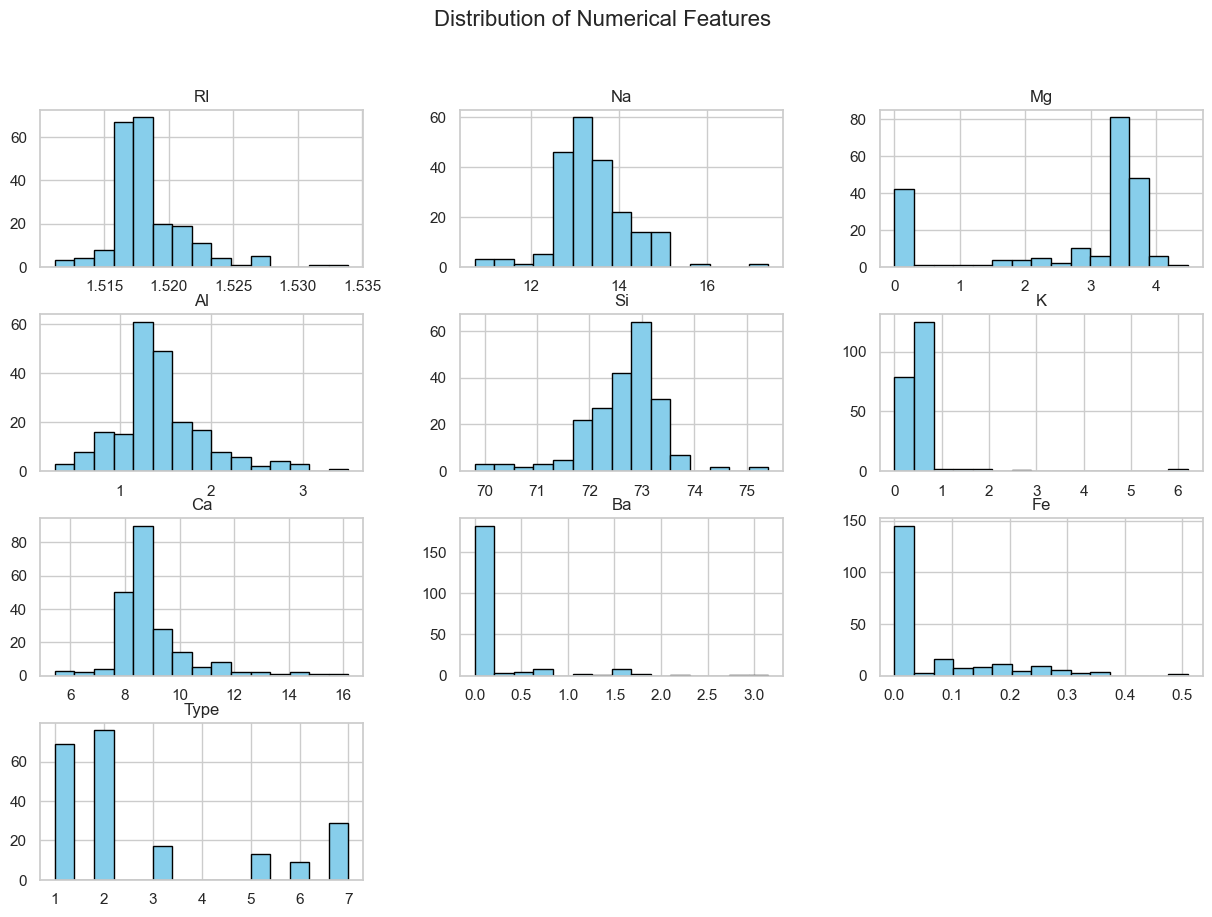

In [11]:
# 2. Data Visualization:

import matplotlib.pyplot as plt
import seaborn as sns

# Set general plot style
sns.set(style="whitegrid")

# Distribution of each numerical feature
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


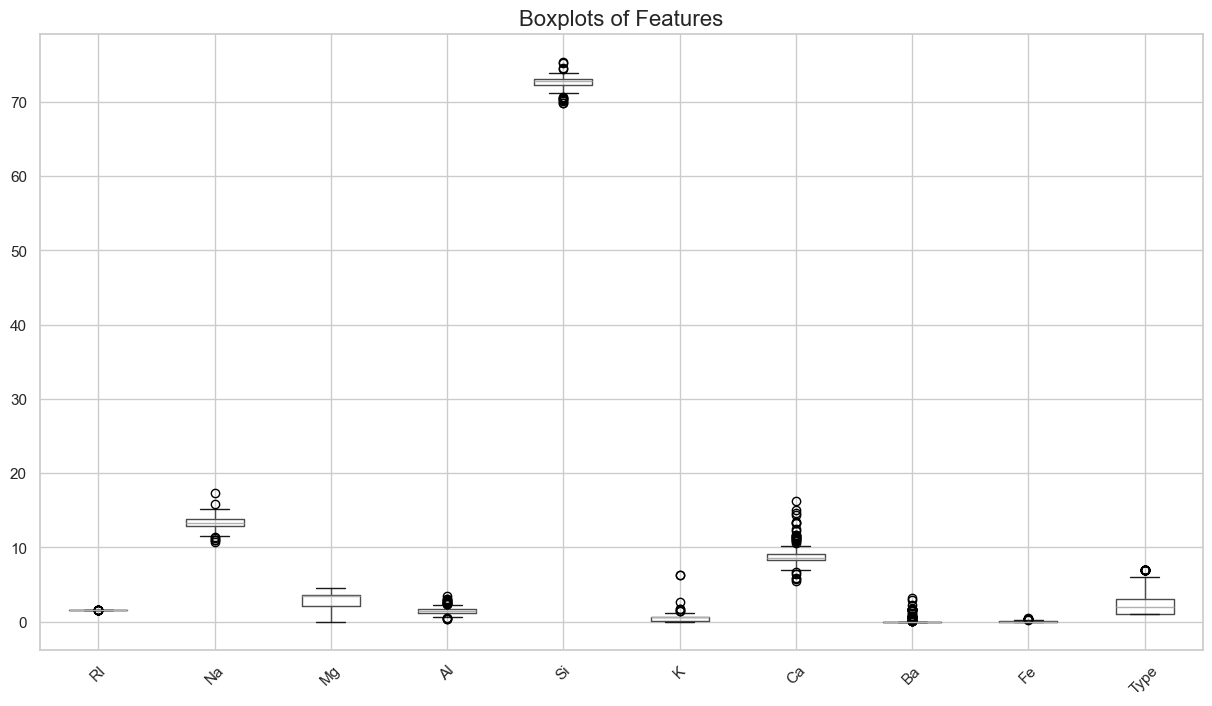

In [12]:
# Boxplots to visualize outliers
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Boxplots of Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()


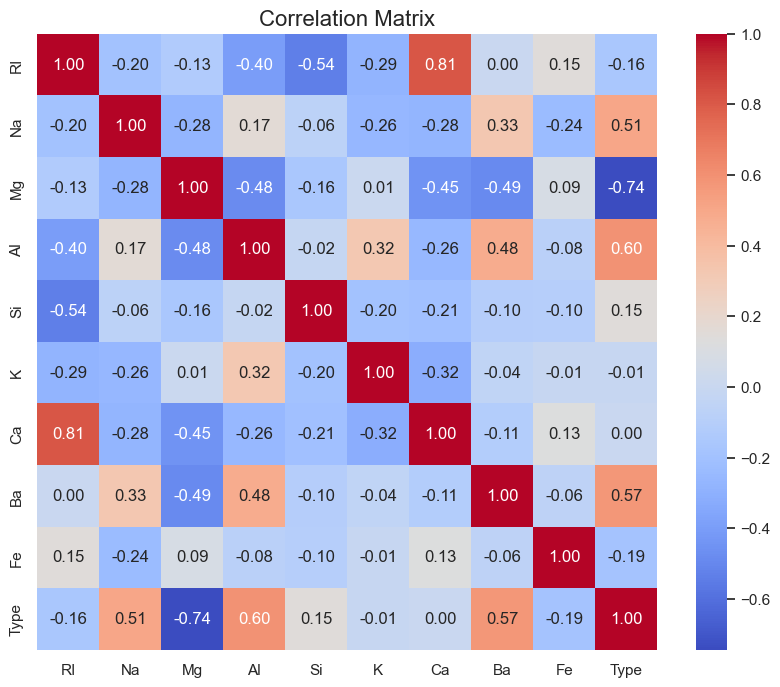

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


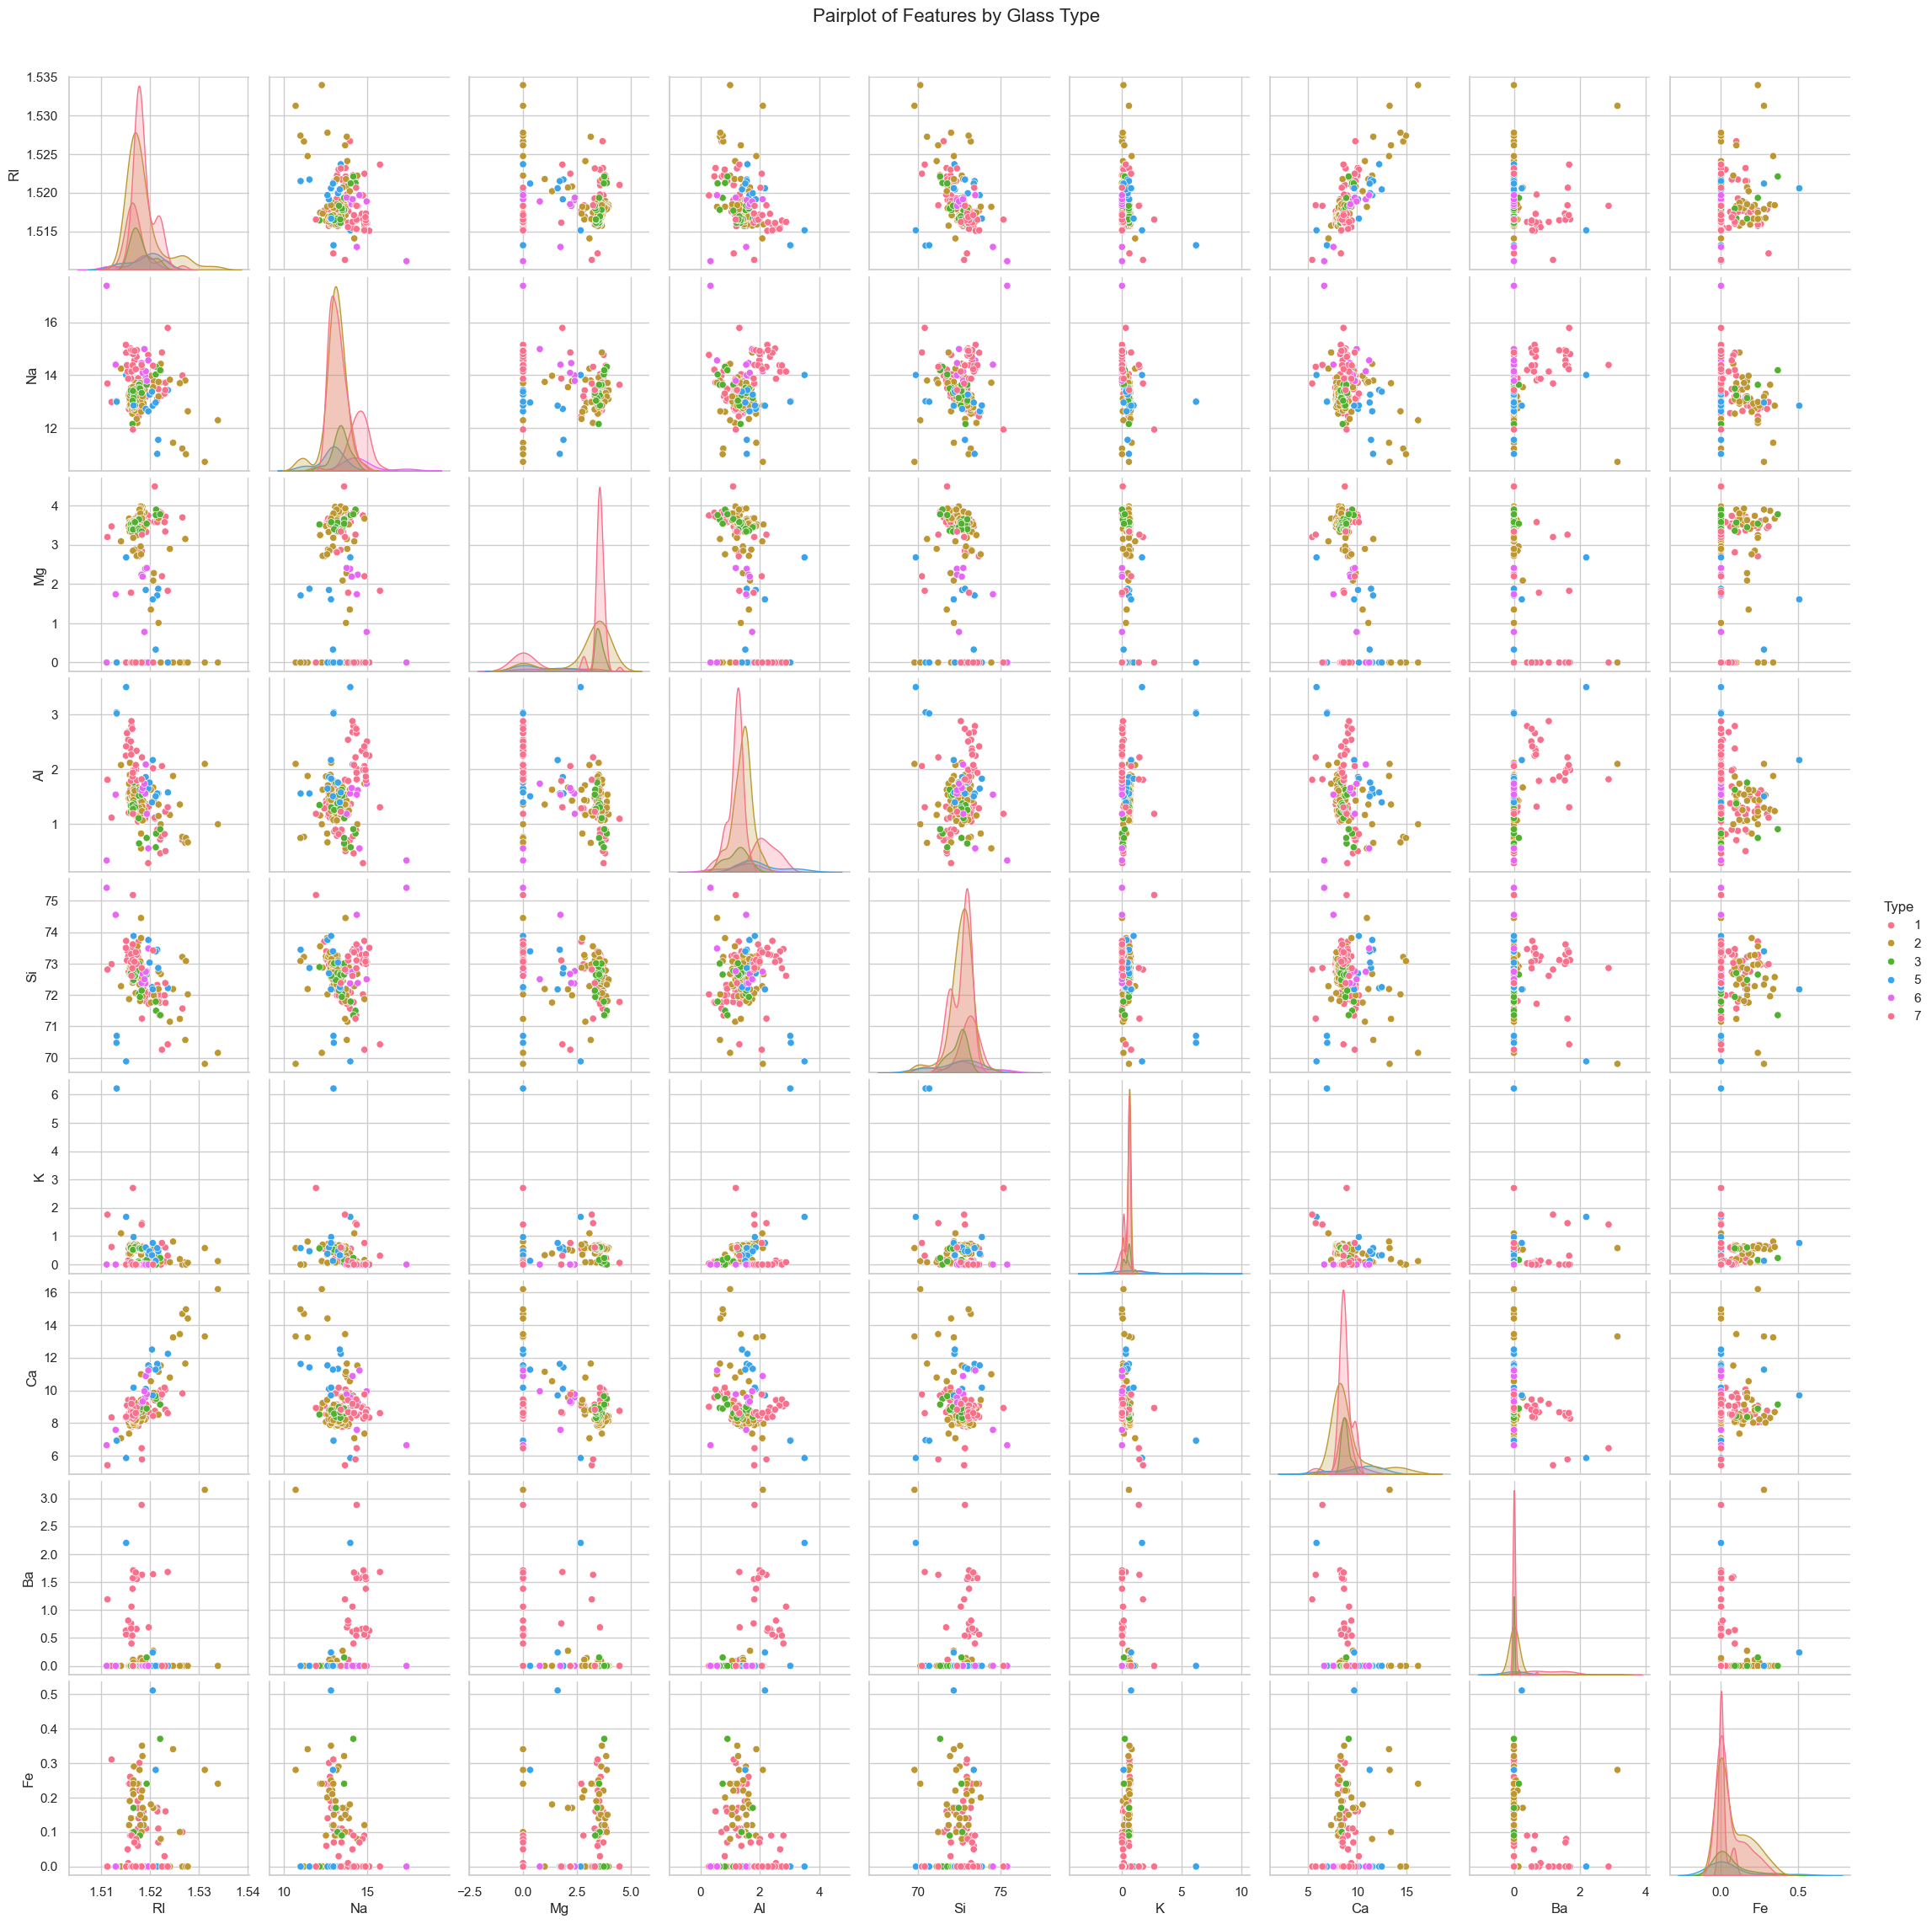

In [14]:
# Pairplot for relationships between variables
sns.pairplot(df, hue="Type", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Features by Glass Type", y=1.02, fontsize=16)
plt.show()


In [ ]:
"""

Data Visualization and Insights:

1. Distribution of Features:

-> Most features (like RI, Na, Al, Si) show approximately normal or slightly skewed distributions.

-> Features like Mg, Ba, and Fe are right-skewed, indicating some concentration of values near zero.

2. Boxplots:

-> Several features such as Ca, Ba, and Fe show outliers.

-> This suggests there may be a few extreme measurements in the dataset.

3. Correlation Heatmap:

-> A strong positive correlation exists between RI and Ca (0.81).

-> A strong negative correlation is observed between Mg and Type (-0.74).

-> This helps identify which features might be important for predicting glass type.

4. Pairplot:

-> The scatter plots show that some glass types are clustered closely together, while others overlap.

-> This suggests that classification might be moderately challenging due to overlapping feature distributions.


"""

In [15]:
# Removing outliers
# Remove outliers using IQR method
import pandas as pd

# Make a copy of the dataset to avoid modifying the original
glass_cleaned = df.copy()

# List of numeric columns (excluding the target 'Type')
numeric_cols = glass_cleaned.drop(columns=['Type']).select_dtypes(include=['float64', 'int64']).columns

# IQR method for outlier removal
for col in numeric_cols:
    Q1 = glass_cleaned[col].quantile(0.25)
    Q3 = glass_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Keep only data within limits
    glass_cleaned = glass_cleaned[(glass_cleaned[col] >= lower_limit) & (glass_cleaned[col] <= upper_limit)]

# Display new shape after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", glass_cleaned.shape)


Shape before removing outliers: (213, 10)
Shape after removing outliers: (104, 10)


In [16]:
glass_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [17]:
# 3: Data Preprocessing

# Check for missing values
print("Missing values per column:\n", glass_cleaned.isnull().sum())


Missing values per column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# No missing values identified in the dataset

In [18]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
X = glass_cleaned.drop("Type", axis=1)
y = glass_cleaned["Type"]

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.292266,2.265044,0.409689,-0.123542,-0.234911,-1.548993,-1.623524,0.0,-0.579856
1,-1.134714,1.234503,0.186612,0.848185,0.475602,-2.877917,-1.766445,0.0,-0.579856
2,0.342160,0.318466,0.811226,-0.501436,-0.562840,-0.220068,-0.508743,0.0,-0.579856
3,0.102667,0.490223,0.498919,-0.771360,0.721549,-0.515384,-0.937505,0.0,-0.579856
4,0.112646,0.576101,0.409689,-1.311208,0.748877,-0.072409,-0.651663,0.0,-0.579856
...,...,...,...,...,...,...,...,...,...
99,-0.855305,-0.168179,-0.482617,-0.663390,0.530257,-0.958359,0.520286,0.0,-0.579856
100,-0.765495,0.890989,-0.527233,-0.555421,-0.480858,-0.958359,0.720375,0.0,-0.579856
101,0.441949,1.234503,-0.438002,0.740215,-2.120503,-0.072409,1.120553,0.0,-0.579856
102,0.641527,1.148624,-0.661079,1.334048,-2.393777,-0.220068,1.177721,0.0,0.653655


In [19]:
# Check class distribution
class_counts = y.value_counts()
print("\nClass Distribution:\n", class_counts)


Class Distribution:
 Type
2    48
1    45
3    11
Name: count, dtype: int64


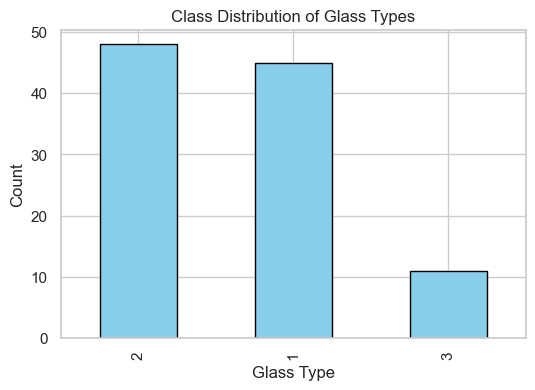

In [20]:
# Visualize imbalance
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


In [21]:
# 4: Random Forest Model Implementation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target
X = X_scaled
y = glass_cleaned['Type']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21


Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]


In [ ]:
"""

Interpretation:

-> The Random Forest model performed excellently, achieving an accuracy of 90.47% on the test set.

-> The classification report shows that all glass types were predicted with high precision and recall, indicating 
   strong generalization capability.

-> The model demonstrates balanced performance across all classes, with only a few minor misclassifications 
   visible in the confusion matrix.

-> The consistently high recall and precision values suggest that the model effectively identifies the true 
   samples for each glass type.

-> Since glass types 1 and 2 have more samples, their predictions are more stable, while even the smaller 
   class (Type 3) was classified with perfect accuracy — reflecting that the model has learned the distinguishing 
   patterns well after scaling and outlier removal.

"""

In [22]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on test data
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Test Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21


Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]


In [23]:
# 5: Bagging and Boosting Methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("Bagging Classifier")
print("Test Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


Bagging Classifier
Test Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21


Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]


In [24]:
# AdaBoost Classifier
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Classifier")
print("Test Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Test Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.75      0.60      0.67        10
           3       1.00      1.00      1.00         2

    accuracy                           0.71        21
   macro avg       0.80      0.79      0.79        21
weighted avg       0.73      0.71      0.71        21


Confusion Matrix:
 [[7 2 0]
 [4 6 0]
 [0 0 2]]


In [25]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classifier")
print("Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
Test Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21


Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]


In [ ]:
"""

Interpretation:

-> The GridSearchCV-tuned Random Forest achieved the same accuracy (90.47%) as the base model, indicating that
   the default parameters were already well-optimized for this dataset. The tuning process confirmed that a 
   larger number of estimators (200) and max_depth=None allowed the model to generalize effectively without 
   overfitting.

-> The Bagging Classifier also reached 90.47% accuracy, demonstrating consistent and stable performance. 
   Since Random Forest itself is based on the Bagging principle, the similar result validates that the dataset's
   variance is well-handled through ensemble averaging.

-> The AdaBoost Classifier showed a slightly lower accuracy (71.42%), performing well for major classes but 
   struggling with smaller ones. This drop is expected because AdaBoost is more sensitive to noisy data and 
   class imbalance, which may cause overemphasis on a few misclassified samples.

-> The Gradient Boosting Classifier achieved 90.47% accuracy, matching the Random Forest model. This shows that 
   both models effectively capture complex nonlinear patterns in the dataset after scaling and cleaning.

-> Overall, the ensemble methods show that boosting and bagging both deliver strong results, with Random Forest 
   and Gradient Boosting emerging as the most reliable models for the Glass dataset. Their performance balance 
   across classes reflects a robust understanding of feature interactions and minimal overfitting.

"""

In [ ]:
"""

Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating):

-> Bagging is an ensemble technique that builds multiple independent models (usually Decision Trees) on different
   random subsets of the training data (created using bootstrapping).
-> The predictions from all models are averaged (for regression) or voted (for classification) to produce the
   final output.

Goal: Reduce variance and avoid overfitting.
Example algorithms: Random Forest, Bagging Classifier.

Boosting:

-> Boosting is a sequential ensemble method where each model learns from the errors of the previous one. 
   The algorithm focuses more on the misclassified samples, assigning them higher weights in subsequent iterations.

Goal: Reduce bias and improve model accuracy.
Example algorithms: AdaBoost, Gradient Boosting, XGBoost.


Key Differences:

   ASPECT              	      BAGGING                         	BOOSTING
Model training           Parallel (independent)	           Sequential (dependent)
Focus	                  Reduces variance	                   Reduces bias
Weight adjustment	   Equal weight to all models	    Higher weight to misclassified samples
Example	                   Random Forest	              Gradient Boosting, AdaBoost



2. Explain how to handle imbalance in the data.

-> Imbalanced datasets occur when one or more classes have significantly fewer samples than others, which can 
   bias the model toward majority classes.
-> Common strategies to handle imbalance include:

   -> Using class_weight='balanced' — automatically adjusts class weights inversely proportional to class 
      frequency.
 
   -> Oversampling minority classes — duplicate or synthetically generate more samples (e.g., using SMOTE).

   -> Undersampling majority classes — randomly reduce samples from majority classes.

   -> Evaluation with balanced metrics — use precision, recall, F1-score instead of accuracy alone.


"""